In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.12 (main, May 27 2025, 17:12:29) [GCC 11.4.0]

---------------------------------
Python interpreter: /home/imarevic/Documents/teaching/SRH/content/statistik/statistik-env/bin/python3


# Die Chi-Quadrat-Verteilung

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

Die Chi-Quadrat ($\chi^2$) ist eine der wichtigsten kontinuierlichen Wahrscheinlichkeitsverteilungen mit vielen Anwendungen in der statistischen Theorie und Inferenz ({cite:p}`Papula2011` s.441).

Sei $n \gt 0$ eine positive ganze Zahl. Für eine Zufallsvariable, die eine ($\chi^2$)-Verteilung mit $n$ Freiheitsgraden ($df$) hat, lautet die Wahrscheinlichkeitsdichtefunktion

$$f(x) =
\begin{cases}
0 & \text{wenn $x \le 0$} \\
\frac{x^{(n/2-1)}e^{-x/2}}{2^{n/2}\Gamma \left(\frac{k}{2}\right)} & \text{wenn $x > 0$}
\end{cases}
$$

wobei $\Gamma$ die <a href="https://de.wikipedia.org/wiki/Gammafunktion">Gamma-Funktion</a> bezeichnet. Die ($\chi^2$)-Verteilung (mit $n$ Freiheitsgraden) ist gleich der $\Gamma$-Verteilung mit den Parametern $(n/2,2)$, d. h. mit Mittelwert und Varianz gleich $n$ bzw. $2n$.

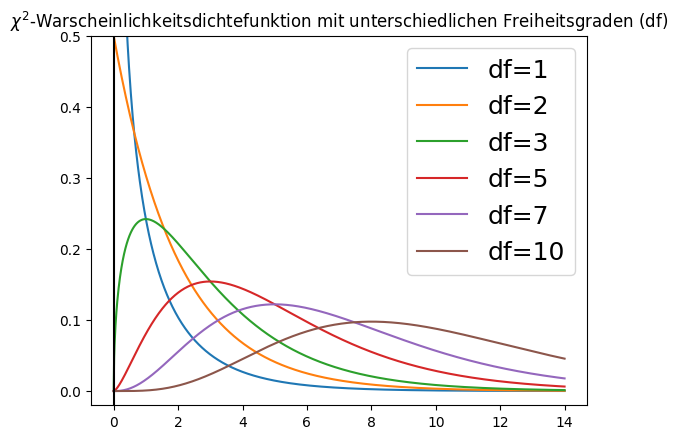

In [3]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

df = [1, 2, 3, 5, 7, 10]

x = np.linspace(0, 14, 1000)
fig, ax = plt.subplots()
for _df in df:
    ax.plot(x, chi2.pdf(x, df=_df), label=f"df={_df}")
ax.set_title(
    "$\chi^2$-Warscheinlichkeitsdichtefunktion mit unterschiedlichen Freiheitsgraden (df)"
)
ax.legend(fontsize=18)
ax.set_ylim(-0.02, 0.5)
ax.axvline(0, color="k")

**Grundlegende Eigenschaften von $\chi^2$-Kurven**

Die Gesamtfläche unter einer $\chi^2$
- Kurve ist gleich $1$
- Eine $\chi^2$-Kurve beginnt bei $0$ auf der horizontalen Achse und erstreckt sich unendlich weit nach rechts, wobei sie sich der horizontalen Achse nähert, diese aber nie berührt.
- Eine $\chi^2$-Kurve ist rechtsschief.
- Mit zunehmender Anzahl von Freiheitsgraden sehen $\chi^2$-Kurven zunehmend wie normalverteilt aus.

## Die Chi-Quadrat-Verteilung in Python
----------------------------------------

Die wichtigsten Funktionen zur Interaktion mit der $\chi^2$-Verteilung sind `chi2.pdf`(), `chi2.cdf()`, `chi2.ppf()`, `chi2.rvs()`. Die Funktion `chi2.pdf()` liefert die Dichte, die Funktion `chi2.cdf()` die Verteilungsfunktion, die Funktion `chi2.ppf()` die Quantilfunktion und die Funktion `chi2.rvs()` die Zufallsabweichungen.

Wir verwenden die Funktion `chi2.pdf()`, um die Dichte für die ganzzahligen Werte $4$ bis $8$ einer $\chi^2$-Kurve mit $df=7$.

In [4]:
for i in range(4, 9):
    print(chi2.pdf(i, df=7))

0.11518072856146785
0.12204152134938738
0.11676521599113947
0.10411977480817192
0.08817913751079275


Wir verwenden `chi2.cdf()`, um die Fläche unter der Kurve für das Intervall $[0,6]$ und das Intervall $[6,\infty[$ einer$\chi^2$-Kurve mit $df=7$ zu berechnen. Weiter fragen wir Python, ob die Summe der Intervalle $[0,6]$ und $[6,\infty[$ den Wert $1$ ergibt.

In [5]:
chi2_cdf1 = chi2.cdf(6, df=7)
chi2_cdf1

np.float64(0.4602506496044429)

In [6]:
chi2_cdf2 = 1 - chi2.cdf(6, df=7)
chi2_cdf2

np.float64(0.539749350395557)

In [7]:
chi2_cdf1 + chi2_cdf2

np.float64(1.0)

Wir verwenden `chi2.ppf()`, um das Quantil für eine bestimmte Fläche (= Wahrscheinlichkeit) unter der Kurve für eine $\chi^2$-Kurve mit $df=7$ zu berechnen, die $q=0,25$,$0,5$,$0,75$ und $0,999$ entspricht.

In [8]:
chi2.ppf(0.25, df=7)

np.float64(4.2548521835465145)

In [9]:
chi2.ppf(0.5, df=7)

np.float64(6.345811195521515)

In [10]:
chi2.ppf(0.75, df=7)

np.float64(9.037147547908143)

In [11]:
chi2.ppf(0.999, df=7)

np.float64(24.321886347856854)

Wir verwenden die Funktion `chi2.rvs()`, um $100.000$ Zufallswerte aus der$\chi^2$-Verteilung mit $df=7$ zu erzeugen. Anschließend zeichnen wir ein Histogramm und vergleichen es mit der Wahrscheinlichkeitsdichtefunktion der $\chi^2$-Verteilung mit $df=7$ (orangefarbene Linie).

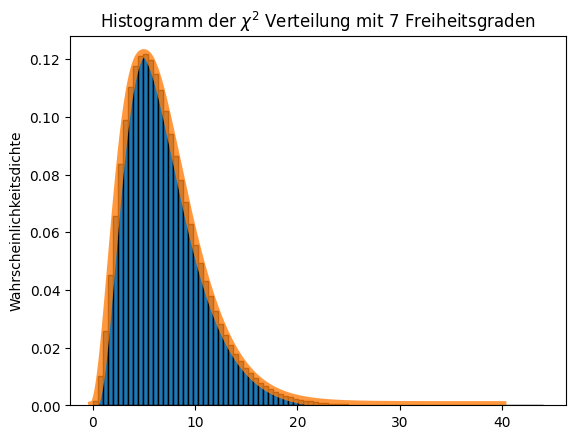

In [12]:
# Erzeuge Chi^2 Werte
chi2_rvs = chi2.rvs(df=7, size=10000000)

# Erzeuge x-werte
x = np.linspace(0, 40, num=1000)

# Plotte chi2-Verteilung
fig, ax = plt.subplots()
ax.set_title("Histogramm der $\chi^2$ Verteilung mit 7 Freiheitsgraden")
ax.set_ylabel("Wahrscheinlichkeitsdichte")
ax.hist(chi2_rvs, bins=90, edgecolor="k", density=True)
ax.plot(x, chi2.pdf(x, df=7), linewidth=6, alpha=0.8)